<a href="https://colab.research.google.com/github/kchaitanya954/Machine-learning-technologies/blob/main/Task_3_Pasala_Krishna_Chaitanya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task3

1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule.

data: bioresponse.csv,

description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 
4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.


In [ ]:
# Import required libraries.
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
# mountiong the drive
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing the data from the drive
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Task #1/bioresponse.csv")
data.isnull().sum().sum()
data.shape

(3751, 1777)

In [ ]:
#Divide the data into independent variables and labels.
X=data.iloc[:, 1:]
y=data[['Activity']]
y.value_counts(normalize=True)

Activity
1           0.542255
0           0.457745
dtype: float64

In [ ]:
#Data is divided for training and testing, here 80% of data is used for training and 20% is used for testing the accurecy.
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25 , random_state=1234 )
X_test.shape

(938, 1776)

In [ ]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = np.ones(1)
    
    return w, b

In [ ]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b[0] )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
# optimizing loss function usig gradient decent

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    np.random.seed(1234)
    costs = []
    grads, cost = propagate(w,b,X,Y)
    costs.append(cost)
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b[0])
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction
    

In [ ]:
# model

def model(X_train, Y_train, X_test, Y_test, optimize, num_iterations, learning_rate , print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    np.random.seed(1234)
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    accuracy_train=(100 - np.mean((np.abs(Y_prediction_train - Y_train)).values) * 100)
    accuracy_test=(100 - np.mean((np.abs(Y_prediction_test - Y_test)).values) * 100)
    accuracy={'train': accuracy_train, 'test':accuracy_test }

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return accuracy, parameters, grads, costs

###Optimizing the loss function using gradient decent

Gradient Decent Model
Accurecy of the model for learning rate: 0.5
{'train': 82.86526839672948, 'test': 76.11940298507463}
Accurecy of the model for learning rate: 0.05
{'train': 81.5854959118379, 'test': 75.3731343283582}
Accurecy of the model for learning rate: 0.005
{'train': 75.68432278706008, 'test': 71.53518123667376}
Accurecy of the model for learning rate: 0.0005
{'train': 57.554212584429436, 'test': 58.52878464818763}
Accurecy of the model for learning rate: 5e-05
{'train': 54.070387486669034, 'test': 54.6908315565032}


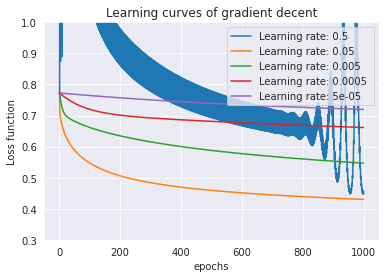

In [ ]:
# Plotting the learning curve for the learning values =[0.5, 0.05, 0.005, 0.0005, 0.00005]
# Caluclating the accuracy of the gradient decent model for different learning rates
accuracy_gd=[]
cost_dg=[]
num_iterations = 1000
print('Gradient Decent Model')

for i in range(1,6):
  learning_rate=5*(10**(-i))
  np.random.seed(1234)
  dim = 1776
  w, b = initialize_with_zeros(dim)
  accuracy, params, grads, costs = model(X_train.T, y_train.T, X_test.T, y_test.T, optimize, num_iterations , learning_rate, print_cost = False)
  cost_dg.append(costs)
  accuracy_gd.append(accuracy)
  print('Accurecy of the model for learning rate: {}'.format(learning_rate))
  print(accuracy)
  plt.plot(np.arange(len(costs)), costs, label='Learning rate: {} '.format(learning_rate))
  plt.legend()
  plt.xlabel('epochs')
  plt.ylabel('Loss function')
  plt.title('Learning curves of gradient decent')
plt.ylim(0.3, 1)
plt.show()

From the above details and graph it is clear that, the accuracy of the gradient decent model is better for learning rate 0.05.  The accuracy keeps decreasing further by increasing the learning rate.

###Optimizing the loss funtion using stochastic gradient descent (SGD) method. 

In [ ]:
# optimizing using sthohastic gradient decent

def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    np.random.seed(1234)
    costs = []
    rows=X.shape[0]
    for i in range(num_iterations):

        np.random.seed(i)
        indexes =np.random.randint(0, len(Y.T))
        X_i=X.iloc[:, indexes:]

        Y_i=Y.iloc[:,indexes:]

        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_i,Y_i)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Stohastic Gradient Decent Model
Accurecy of the model for learning rate: 0.5
{'train': 81.1589050835407, 'test': 76.22601279317698}
Accurecy of the model for learning rate: 0.05
{'train': 79.98578030572342, 'test': 74.73347547974413}
Accurecy of the model for learning rate: 0.005
{'train': 75.64877355136865, 'test': 71.32196162046908}
Accurecy of the model for learning rate: 0.0005
{'train': 58.62068965517241, 'test': 59.1684434968017}
Accurecy of the model for learning rate: 5e-05
{'train': 54.070387486669034, 'test': 54.6908315565032}


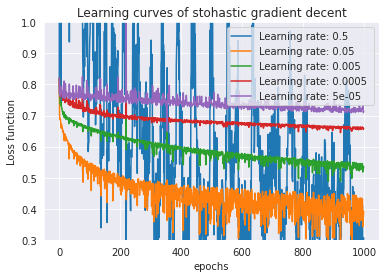

In [ ]:
# Plotting the learning curve for stohastic gradient decent for the learning values =[0.5, 0.05, 0.005, 0.0005, 0.00005]
# Caluclating the accuracy of the stohastic gradient decent model for different learning rates
accuracy_sgd=[]
cost_sdg=[]
num_iterations = 1000
print('Stohastic Gradient Decent Model')
for i in range(1,6):
  learning_rate=5*(10**(-i))
  np.random.seed(1234)
  dim = 1776
  w, b = initialize_with_zeros(dim)
  accuracy, params, grads, costs = model(X_train.T, y_train.T, X_test.T, y_test.T, optimize_sgd, num_iterations , learning_rate, print_cost = False)
  cost_dg.append(costs)
  accuracy_sgd.append(accuracy)
  print('Accurecy of the model for learning rate: {}'.format(learning_rate))
  print(accuracy)
  plt.plot(np.arange(len(costs)), costs, label='Learning rate: {} '.format(learning_rate))
  plt.legend()
  plt.xlabel('epochs')
  plt.ylabel('Loss function')
  plt.title('Learning curves of stohastic gradient decent')
plt.ylim(0.3, 1)
plt.show()

1.   From the above details and graph it is clear that, the accuracy of the stohastic gradient decent model is better for learning rate 0.05.  The accuracy keeps decreasing further by increasing the learning rate.
2.  The accuracy of both gradient and stohastic gradient decent is nearly similar, but stohastic is computationally better as it used random sample batch.



###Optimizing the loss funtion using Adam method. 

In [ ]:
# optimize

def optimize_adam(w, b, X, Y, num_iterations, alpha, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    beta_1=0.9
    beta_2=0.999
    costs = []
    eps=1e-8
    m_w=np.zeros(w.shape)
    v_w=np.zeros(w.shape)

    m_b=np.zeros(b.shape)
    v_b=np.zeros(b.shape)
    grads, cost = propagate(w,b,X,Y)
    costs.append(cost)
    for i in range(1,num_iterations):       

        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]

        m_w = beta_1 * m_w + (1.0 - beta_1) * dw
        v_w = beta_2 * v_w + (1.0 - beta_2) * dw**2
        mhat_w = m_w / (1.0 - beta_1**(i))
        vhat_w =  v_w / (1.0 - beta_2**(i))

        m_b = beta_1 * m_b + (1.0 - beta_1) * db
        v_b = beta_2 * v_b + (1.0 - beta_2) * db**2
        mhat_b = m_b / (1.0 - beta_1**(i))
        vhat_b = v_b / (1.0 - beta_2**(i))
        # Retrieve derivatives from grads
        w=np.subtract(w , alpha*np.divide(mhat_w , (np.sqrt(vhat_w) + eps)))
        b=np.subtract(b , alpha*np.divide(mhat_b , (np.sqrt(vhat_b) + eps)))
        # update rule

        
        # Record the costs
        #if i % 10 == 0:
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Adams Model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


Accurecy of the model for learning rate: 0.5
{'train': 83.29185922502666, 'test': 70.25586353944563}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


Accurecy of the model for learning rate: 0.05
{'train': 94.09882687522219, 'test': 72.92110874200426}
Accurecy of the model for learning rate: 0.005
{'train': 91.290437255599, 'test': 75.05330490405117}
Accurecy of the model for learning rate: 0.0005
{'train': 84.5360824742268, 'test': 74.20042643923242}
Accurecy of the model for learning rate: 5e-05
{'train': 74.68894418769996, 'test': 71.42857142857143}


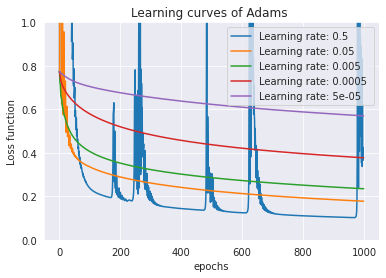

In [ ]:
# Plotting the learning curve for adam model for the learning values =[0.5, 0.05, 0.005, 0.0005, 0.00005]
# Caluclating the accuracy of the adam model for different learning rates
accuracy_adam=[]
cost_adam=[]
num_iterations = 1000
np.random.seed(1234)
print('Adams Model')
for i in range(1,6):
  learning_rate=5*(10**(-i))
  np.random.seed(1234)
  dim = 1776
  w, b = initialize_with_zeros(dim)
  accuracy, params, grads, costs = model(X_train.T, y_train.T, X_test.T, y_test.T, optimize_adam, num_iterations , learning_rate, print_cost = False)
  cost_adam.append(costs)
  accuracy_adam.append(accuracy)
  print('Accurecy of the model for learning rate: {}'.format(learning_rate))
  print(accuracy)
  plt.plot(np.arange(len(costs)), costs, label='Learning rate: {} '.format(learning_rate))
  plt.legend()
  plt.xlabel('epochs')
  plt.ylabel('Loss function')
  plt.title('Learning curves of Adams ')
plt.ylim(0, 1)
plt.show()



1.   The accuracy of the adam model is better than the gradient and stohastic gradient decent.
2.   The accuracy of the model is better at the learning rate 0.05 and 0.005 and it gets worse at lower learning rate.

